# Projet Radiography Covid19

## 1 - Exploration des données

### 1.1 - Metadata et fichiers .png

In [122]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# parametres
project_path = "C:\\Users\\Florent\\Documents\\data_science\\COVID-19_Radiography_Dataset\\COVID-19_Radiography_Dataset"
average_images_path = os.path.join(project_path, "average_images")
covid_path = os.path.join(project_path, "COVID")
lung_path = os.path.join(project_path, "Lung_Opacity")
normal_path = os.path.join(project_path, "Normal")
pneumo_path = os.path.join(project_path, "Viral Pneumonia")

dict_data_path = {
    'COVID' : covid_path,
    'Lung_Opacity' : lung_path,
    'Normal' : normal_path,
    'Viral Pneumonia' : pneumo_path 
}


# import des fichiers de metadata dans un dictionnaire de DataFrames
metadata_files = []

for filename in os.listdir(project_path):
    if ".metadata" in filename:
        metadata_files.append(filename)


metadata_dict = {}

for name in metadata_files:
    df_name = name.split(".metadata.xlsx")[0]
    df = pd.read_excel(project_path + "\\" + name)
    metadata_dict[df_name] = df

# print(metadata_dict.keys()) # ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']


# contenu du dossier 
folder_content_list = os.listdir(project_path)
print("Contenu du dossier :", "\n")
print('\n'.join(folder_content_list))


Contenu du dossier : 

average_images
COVID
COVID.metadata.xlsx
Lung_Opacity
Lung_Opacity.metadata.xlsx
Normal
Normal.metadata.xlsx
README.md.txt
Viral Pneumonia
Viral Pneumonia.metadata.xlsx


#### Description des fichiers de **metadata**

In [75]:
# Colonnes dans chacun des df de metadata
for key in metadata_dict.keys():
    print(f"colonnes metadata {key} :", metadata_dict[key].columns)


# Nombre de valeurs, de na et valeurs uniques par colonne
rows_metadata = []

for key in metadata_dict.keys():
    for col in metadata_dict[key].columns:
        nb_obs = metadata_dict[key][col].count()
        nb_unique = metadata_dict[key][col].nunique()
        nb_na = metadata_dict[key][col].isna().sum()
        ex_value = metadata_dict[key][col][0]

        rows_metadata.append({
            "data": key, 
            "colonne": col, 
            "Nb_observations": nb_obs, 
            "Nb_valeurs_uniques": nb_unique, 
            "Nb_NA": nb_na,
            "exemple valeur": ex_value
            })

df_descr_metadata = pd.DataFrame(rows_metadata)

print("shape df_descr_metadata :", df_descr_metadata.shape)
df_descr_metadata.head(16)

colonnes metadata COVID : Index(['FILE NAME', 'FORMAT', 'SIZE', 'URL'], dtype='object')
colonnes metadata Lung_Opacity : Index(['FILE NAME', 'FORMAT', 'SIZE', 'URL'], dtype='object')
colonnes metadata Normal : Index(['FILE NAME', 'FORMAT', 'SIZE', 'URL'], dtype='object')
colonnes metadata Viral Pneumonia : Index(['FILE NAME', 'FORMAT', 'SIZE', 'URL'], dtype='object')
shape df_descr_metadata : (16, 6)


,data,colonne,Nb_observations,Nb_valeurs_uniques,Nb_NA,exemple valeur
0,COVID,FILE NAME,3616,3616,0,COVID-1
1,COVID,FORMAT,3616,1,0,PNG
2,COVID,SIZE,3616,1,0,256*256
3,COVID,URL,3616,6,0,https://sirm.org/category/senza-categoria/covi...
4,Lung_Opacity,FILE NAME,6012,6012,0,Lung_Opacity-1
5,Lung_Opacity,FORMAT,6012,1,0,PNG
6,Lung_Opacity,SIZE,6012,1,0,256*256
7,Lung_Opacity,URL,6012,1,0,https://www.kaggle.com/c/rsna-pneumonia-detect...
8,Normal,FILE NAME,10192,10192,0,NORMAL-1
9,Normal,FORMAT,10192,1,0,PNG


#### Description du contenu des dossiers **images** et **masks**

In [76]:
# Nombre de fichiers et formats par dossier 

rows_data = []

for key, path in dict_data_path.items():

    for folder in ["images", "masks"]:
        folder_path  = os.path.join(path, folder)
        files = os.listdir(folder_path) 
    
        nb_files = len(files)
        formats = [file.split(".")[-1] for file in files]
        nb_format = len(set(formats))
        distinct_formats = list(set(formats))
        ex_file_name = files[0]

        rows_data.append({
            "data": key, 
            "dossier": folder, 
            "Nb fichiers": nb_files, 
            "Nb de formats differents": nb_format, 
            "Formats présents": distinct_formats,
            "exemple nom fichier": ex_file_name
        })

df_descr_data = pd.DataFrame(rows_data)

print("shape df_descr_data :", df_descr_data.shape)
df_descr_data.head(8)

shape df_descr_data : (8, 6)


,data,dossier,Nb fichiers,Nb de formats differents,Formats présents,exemple nom fichier
0,COVID,images,3616,1,[png],COVID-1.png
1,COVID,masks,3616,1,[png],COVID-1.png
2,Lung_Opacity,images,6012,1,[png],Lung_Opacity-1.png
3,Lung_Opacity,masks,6012,1,[png],Lung_Opacity-1.png
4,Normal,images,10192,1,[png],Normal-1.png
5,Normal,masks,10192,1,[png],Normal-1.png
6,Viral Pneumonia,images,1345,1,[png],Viral Pneumonia-1.png
7,Viral Pneumonia,masks,1345,1,[png],Viral Pneumonia-1.png


#### Cohérence entre **images** et **masks**

In [77]:
# Tous les noms de fichier du dossier images] sont-ils bien retrouvés dans le dossier masks ?

rows_images_masks = []

for key, path in dict_data_path.items():

    images_path = os.path.join(path, "images")
    masks_path = os.path.join(path, "masks")
    
    images_files = set(os.listdir(images_path))
    masks_files = set(os.listdir(masks_path))

    images_not_in_masks = images_files - masks_files
    masks_not_in_images = masks_files - images_files

    nb_images_not_in_masks = len(images_not_in_masks)
    nb_masks_not_in_images = len(masks_not_in_images)

    if nb_images_not_in_masks not in locals():
        nb_images_not_in_masks = 0

    if nb_masks_not_in_images not in locals():
        nb_masks_not_in_images = 0

    rows_images_masks.append({
        "data": key, 
        "Nb fichiers dans images": len(images_files),
        "Nb fichiers dans masks": len(masks_files),
        "Nb images non retrouvés dans masks": nb_images_not_in_masks, 
        "Nb masks non retrouvés dans images": nb_masks_not_in_images
        })

df_descr_images_masks = pd.DataFrame(rows_images_masks)


print("shape df_descr_images_masks :", df_descr_images_masks.shape)
df_descr_images_masks.head(8)


shape df_descr_images_masks : (4, 5)


,data,Nb fichiers dans images,Nb fichiers dans masks,Nb images non retrouvés dans masks,Nb masks non retrouvés dans images
0,COVID,3616,3616,0,0
1,Lung_Opacity,6012,6012,0,0
2,Normal,10192,10192,0,0
3,Viral Pneumonia,1345,1345,0,0


#### Cohérence entre **metadata** et **images** et **masks**

In [78]:
# Tous les id sont retrouvés entre metadata, image et metadata ?
# (juste entre metadata et images suffit)
# colonne "FILE NAME" dans chacun des fichiers de metadata

rows_metadata_images = []

for key, path in dict_data_path.items():

    file_names_metadata = set(metadata_df[key]["FILE NAME"])

    images_path  = os.path.join(path, "images")
    images_files = set(os.listdir(images_path))
    # suppression de l'extension .png
    images_files_without_extension = {image_file_name.rstrip(".png") for image_file_name in images_files}

    images_not_in_metadata = images_files_without_extension - file_names_metadata
    metadata_not_in_images = file_names_metadata - images_files_without_extension

    nb_images_not_in_metadata = len(images_not_in_metadata)
    nb_metadata_not_in_images = len(metadata_not_in_images)

    if nb_images_not_in_metadata not in locals():
        nb_images_not_in_metadata = 0

    if nb_metadata_not_in_images not in locals():
        nb_metadata_not_in_images = 0

    rows_metadata_images.append({
        "data": key, 
        "Nb fichiers dans images": len(images_files_without_extension),
        "Nb fichiers dans metadata": len(file_names_metadata),
        "Nb images non retrouvés dans metadata": nb_images_not_in_metadata, 
        "Nb metadata non retrouvés dans images": nb_metadata_not_in_images
        })

df_descr_images_metadata = pd.DataFrame(rows_metadata_images)


print("shape df_descr_images_metadata :", df_descr_images_metadata.shape)
df_descr_images_metadata.head(4)


shape df_descr_images_metadata : (4, 5)


,data,Nb fichiers dans images,Nb fichiers dans metadata,Nb images non retrouvés dans metadata,Nb metadata non retrouvés dans images
0,COVID,3616,3616,0,0
1,Lung_Opacity,6012,6012,0,0
2,Normal,10192,10192,0,0
3,Viral Pneumonia,1345,1345,0,0


#### Cohérence avec les **effectifs** sur le fichier **README.md**

Est-ce qu'on retrouve les mêmes effectifs par source de donnée ?

In [81]:
# sur le README : 
# **COVID-19 data:
# -----------------------
# COVID data are collected from different publicly accessible dataset, online sources and published papers.
# -2473 CXR images are collected from padchest dataset[1].
# -183 CXR images from a Germany medical school[2].
# -559 CXR image from SIRM, Github, Kaggle & Tweeter[3,4,5,6]
# -400 CXR images from another Github source[7].

# dans les données :
print(metadata_df["COVID"]["URL"].value_counts())

URL
https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711    2474
https://github.com/armiro/COVID-CXNet                                               400
https://eurorad.org                                                                 258
https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png           183
https://github.com/ieee8023/covid-chestxray-dataset                                 182
https://sirm.org/category/senza-categoria/covid-19/                                 119
Name: count, dtype: int64


In [82]:
# sur le README : 
# ***Normal images:
# ---------------------------------------- 
# 10192 Normal data are collected from from three different dataset.
# -8851 RSNA [8]
# -1341 Kaggle [9]

# dans les données :
print(metadata_df["Normal"]["URL"].value_counts())

URL
https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data    8851
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia       1341
Name: count, dtype: int64


In [83]:
# sur le README : 
# ***Lung opacity images:
# ---------------------------------------- 
# 6012 Lung opacity CXR images are collected from Radiological Society of North America (RSNA) CXR dataset  [8]

# dans les données :
print(metadata_df["Lung_Opacity"]["URL"].value_counts())

URL
https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data    6012
Name: count, dtype: int64


In [84]:
# sur le README : 
# ***Viral Pneumonia images:
# ---------------------------------------- 
# 1345 Viral Pneumonia data are collected from  the Chest X-Ray Images (pneumonia) database [9]

# dans les données :
print(metadata_df["Viral Pneumonia"]["URL"].value_counts())

URL
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia    1345
Name: count, dtype: int64


#### **Conclusion** sur les metadata et les .png

- 4 jeux de données : COVID, Lung_Opacity, Normal, Viral Pneumonia.  

- Chaque jeu de données contient un fichier de metadata et 2 dossiers copntenant des .pn,g : "images" et "masks".  

- Ensemble de données très propre : pas de Na, pas de doublons d'id, même structure pour les 4 jeux de données.  

- Cohérence parfaite entre metadata, images et masks : chaque id est retrouvé dans les 3 sources.  

- Globalement on retrouve les effectifs annoncés dans le README, sauf peut être pour le jeu de données COVID pour lequel il y a eu des regroupements de sources dans le README.  


### 1.2 - Description des .png

- Nombre de canaux  = nombre de couches de couleurs dans l'image, si niveau de gris : 1 seul canal, en couleur : 3 (RVB)
- Images moyennes : calculer une image moyenne en combinant plusieurs images pour obtenir moyenne de l'ensemble des données : pour avoir une idée de l'apparence des images par jeu de données ?
- Intensité de pixels : distribution (quartiles, std, mean...) pour avoir des infos sur la luminosité et le contraste des images

+ ACP ? 

#### Indicateurs et calcul de l'image moyenne/dataset


In [105]:
# Description des images
# + calcul d'une image moyenne

png_data = []

for key, path in dict_data_path.items():
    for folder in ["images", "masks"]:
        folder_path  = os.path.join(path, folder)

        png_list = []

        for png_file in os.listdir(folder_path):

            png_path = os.path.join(folder_path, png_file)

            # chargement de l'image avec OpenCV en niveau de gris
            png = cv2.imread(png_path, cv2.IMREAD_GRAYSCALE) 

            # caracteristiques de l'image
            height, width = png.shape
            channels = 1  # Niveaux de gris
            mean_intensity = np.mean(png)
            std_intensity = np.std(png)
            min_intensity = np.min(png)
            max_intensity = np.max(png)

            png_data.append({
                "data": key, 
                "dossier": folder, 
                "Png name": png_file,
                "Hauteur": height,
                "Largeur": width,
                "Canaux": channels,
                "Intensité moyenne": mean_intensity,
                "Ecart type Intensité": std_intensity,
                "Min Intensité": min_intensity,
                "Max Intensité": max_intensity
            })
        
            # enregistrement de l'image dans la liste
            png_list.append(png)

        # calcul de l'image moyenne
        average_image = np.mean(png_list, axis=0).astype(np.uint8)
        # export de l'image moyenne dans un fichier
        cv2.imwrite(os.path.join(project_path, f"average_image_{key}_{folder}.png"), average_image)

df_descr_png = pd.DataFrame(png_data)


print("shape df_descr_png :", df_descr_png.shape)
df_descr_png.head(16)


shape df_descr_png : (42330, 10)


,data,dossier,Png name,Hauteur,Largeur,Canaux,Intensité moyenne,Ecart type Intensité,Min Intensité,Max Intensité
0,COVID,images,COVID-1.png,299,299,1,145.896847,51.816632,0,255
1,COVID,images,COVID-10.png,299,299,1,141.355466,40.623291,0,227
2,COVID,images,COVID-100.png,299,299,1,152.878570,73.778044,0,255
3,COVID,images,COVID-1000.png,299,299,1,162.771054,76.249129,0,252
4,COVID,images,COVID-1001.png,299,299,1,129.890784,66.179559,0,242
5,COVID,images,COVID-1002.png,299,299,1,175.738761,56.926155,5,255
6,COVID,images,COVID-1003.png,299,299,1,160.755931,63.503526,0,255
7,COVID,images,COVID-1004.png,299,299,1,135.653997,56.232302,0,242
8,COVID,images,COVID-1005.png,299,299,1,140.919867,42.645260,11,226
9,COVID,images,COVID-1006.png,299,299,1,147.757654,41.569151,0,216


#### Dimensions des images

In [113]:
# Dimension des images 

print(df_descr_png.groupby(['data', 'dossier'])['Hauteur'].value_counts())
print(df_descr_png.groupby(['data', 'dossier'])['Largeur'].value_counts())

print(df_descr_png.groupby(['dossier'])['Hauteur'].value_counts())
print(df_descr_png.groupby(['dossier'])['Largeur'].value_counts())

data             dossier  Hauteur
COVID            images   299         3616
                 masks    256         3616
Lung_Opacity     images   299         6012
                 masks    256         6012
Normal           images   299        10192
                 masks    256        10192
Viral Pneumonia  images   299         1345
                 masks    256         1345
Name: count, dtype: int64
data             dossier  Largeur
COVID            images   299         3616
                 masks    256         3616
Lung_Opacity     images   299         6012
                 masks    256         6012
Normal           images   299        10192
                 masks    256        10192
Viral Pneumonia  images   299         1345
                 masks    256         1345
Name: count, dtype: int64
dossier  Hauteur
images   299        21165
masks    256        21165
Name: count, dtype: int64
dossier  Largeur
images   299        21165
masks    256        21165
Name: count, dtype: int64


Dimensions différentes pour les images (299x299) et les masks (256x256).

=> prévoir un redimensionnement dans le préprocessing pour toutes les mettre aux mêmes dimensions ?

#### Distribution de l'intensité moyenne des pixels

Intensité moyenne pour chaque fichier .png, par jeu de données (COVID, NORMAL...) et par dossier (images, masks)

On sépare les descriptions sur les fichiers 'images' des fichiers 'masks'.

##### images

In [158]:
def display_distrib_int_pixels(df, titre):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()

    for i, (data, group) in enumerate(df.groupby('data')):
        q1 = group['Intensité moyenne'].quantile(0.25)
        median = group['Intensité moyenne'].median()
        q3 = group['Intensité moyenne'].quantile(0.75)
        moy = group['Intensité moyenne'].mean()
        sd = group['Intensité moyenne'].std()

        ax = axes[i]  # Select the current subplot

        sns.histplot(data=group, x='Intensité moyenne', kde=True, ax=ax)

        ax.set_title(f'{data}')
        ax.set_xlabel('Intensité moyenne')
        ax.set_ylabel('Frequency')

        # info distrib : 
        ax.text(0.95, 0.95, f'Q1: {q1:.2f}', ha='right', va='top', transform=ax.transAxes)
        ax.text(0.95, 0.85, f'Median: {median:.2f}', ha='right', va='top', transform=ax.transAxes)
        ax.text(0.95, 0.75, f'Q3: {q3:.2f}', ha='right', va='top', transform=ax.transAxes)
        ax.text(0.95, 0.65, f'Moyenne: {moy:.2f}', ha='right', va='top', transform=ax.transAxes)
        ax.text(0.95, 0.55, f'Std: {sd:.2f}', ha='right', va='top', transform=ax.transAxes)

    # plt.tight_layout() # Adjust layout to prevent overlap of subplot titles
    fig.suptitle(titre, fontsize=16)
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.5, wspace=0.5)

    plt.show()

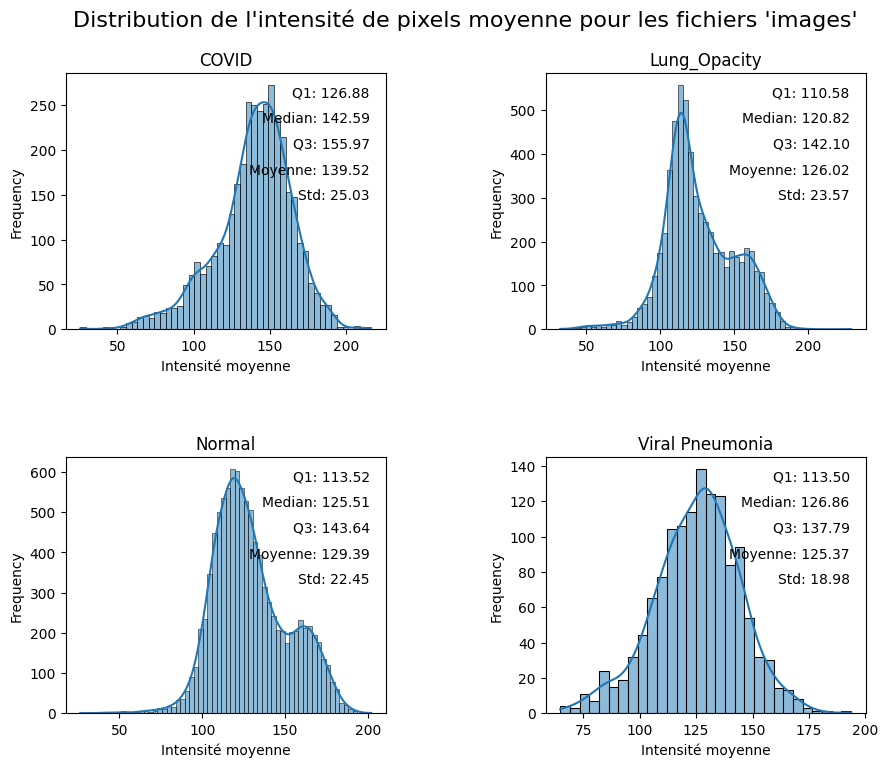

In [159]:
# Pour les images

df_images = df_descr_png.loc[df_descr_png.dossier == "images"]

display_distrib_int_pixels(df_images, "Distribution de l'intensité de pixels moyenne pour les fichiers 'images'")

##### masks

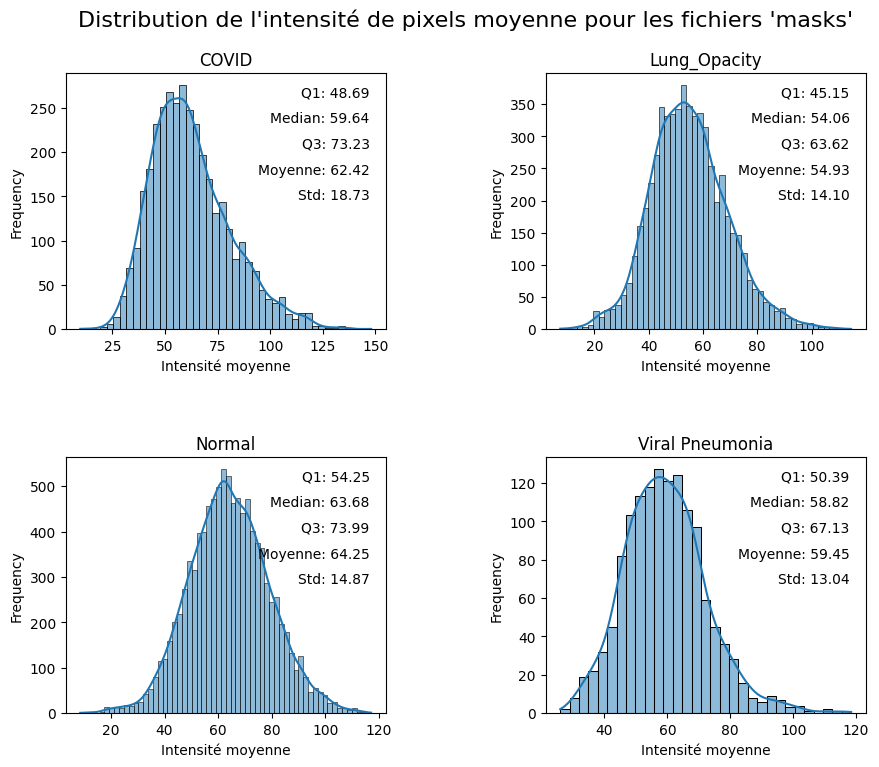

In [160]:
# Pour les masks

df_masks = df_descr_png.loc[df_descr_png.dossier == "masks"]

display_distrib_int_pixels(df_masks, "Distribution de l'intensité de pixels moyenne pour les fichiers 'masks'")

#### Images moyennes

##### images

In [163]:
def display_images_moyennes(png_dict, titre):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    # Flatten the axes array
    axes = axes.flatten()

    # Load and display each image in a subplot
    for i, (image_file, title) in enumerate(png_dict.items()):
        image_path = os.path.join(average_images_path, image_file)

        # Load the image
        image = plt.imread(image_path)

        # Display the image as grayscale
        axes[i].imshow(image, cmap='gray')
        
        axes[i].set_title(title)
        axes[i].axis('off')

    # Adjust layout and display the figure
    # plt.tight_layout()
    fig.suptitle(titre, fontsize=16)
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.5, wspace=0.5)
    
    plt.show()

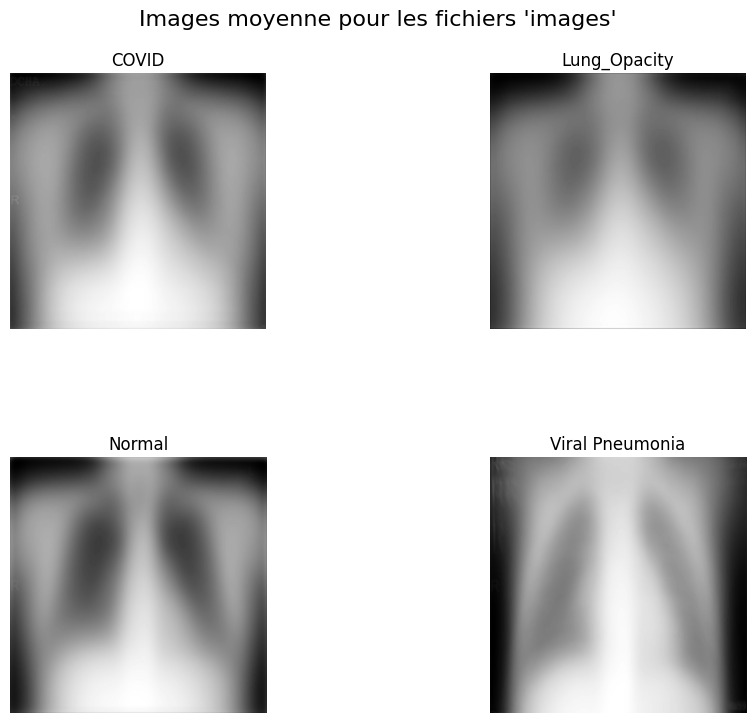

In [164]:
# images moyennes pour images

images_dict = {
    "average_image_COVID_images.png": "COVID",
    "average_image_Lung_Opacity_images.png": "Lung_Opacity",
    "average_image_Normal_images.png": "Normal",
    "average_image_Viral Pneumonia_images.png": "Viral Pneumonia"
}

display_images_moyennes(images_dict, "Images moyenne pour les fichiers 'images'")



##### masks

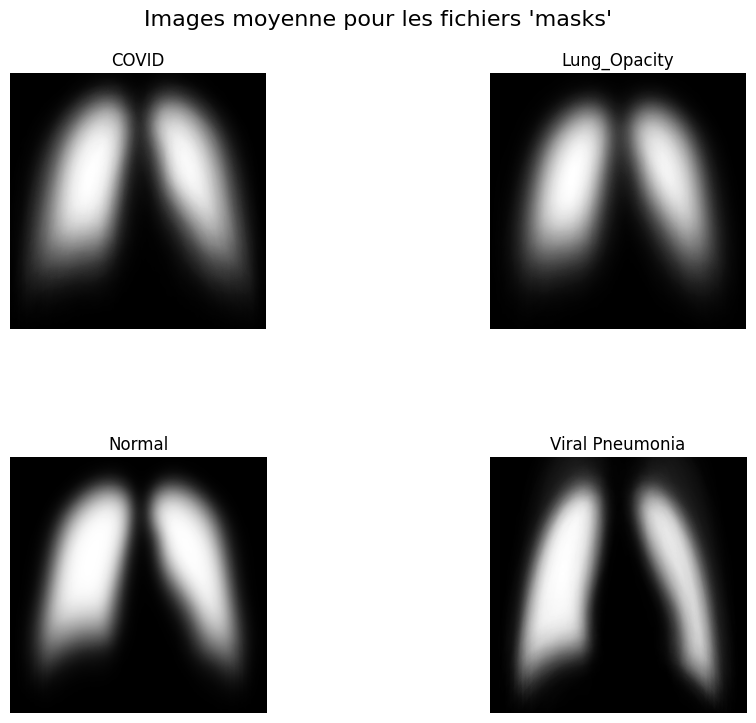

In [165]:
# images moyennes pour masks

masks_dict = {
    "average_image_COVID_masks.png": "COVID",
    "average_image_Lung_Opacity_masks.png": "Lung_Opacity",
    "average_image_Normal_masks.png": "Normal",
    "average_image_Viral Pneumonia_masks.png": "Viral Pneumonia"
}

display_images_moyennes(masks_dict, "Images moyenne pour les fichiers 'masks'")